In [8]:
import tensorflow as tf
import os
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import csv
PH = 5

def readData(filename):
    #실제 반환될 배열
    EntryData = []
    x_data = []
    y_data = []
    A1c_data = []
    glucose_data =[]
    ####임시 배열
    tmp_x = []
    tmp_y = []
    tmp_A1c = []
    tmp_glucose = []
    with open(filename,'r') as f:
        for line in f:
            EntryData.append(float(line))
    
    df = pd.Series(EntryData)
    A1c = df[0:1]
    glucose = df[1:2]
    while True:
        
        for i in df[1:8]:
            tmp_x.append([float(i)])
        tmp_y.append(float(df[7 + (PH/5)]))
        tmp_A1c.append(float(A1c))
        tmp_glucose.append(float(glucose))
        
        x_data.append(tmp_x)
        y_data.append(tmp_y)
        A1c_data.append(tmp_A1c)
        glucose_data.append(tmp_glucose)
        
        tmp_x = []
        tmp_y = []
        tmp_A1c = []
        tmp_glucose = []
        df = df.shift(-1)
        if(math.isnan(df[7+(PH/5)])):
            break
        
    if(len(x_data[-1]) != 7):
       xSize = 7-len(x_data[-1])
       for i in range(xSize):
           x_data[-1].append(0.0)
    if(len(y_data[-1])!=1):
       y_data[-1].append(0.0)
    
    x_data = np.asarray(x_data)
    y_data = np.asarray(y_data)
    A1c_data = np.asarray(A1c_data)
    glucose_data = np.asarray(glucose_data)
    data = [x_data,y_data,A1c_data,glucose_data]
    return data



filename = os.listdir("sch")
print(filename[5])
train_data_name = []
test_data_name = []

for fn in filename:
    if fn.find("test") != -1:
        test_data_name.append(fn)
    elif fn.find("train") != -1:
        train_data_name.append(fn)

glucoseList = []
glucose_train = []
glucose_test = []
        
A1cList = []
A1c_train = []
A1c_test = []

total_x_data = []
total_y_data = []        

train_x_data = []
train_y_data = []

for fn in train_data_name:
    if fn.find("885633") != -1:
        print(fn+"제외")
    elif fn.find("365303") != -1:
        print(fn+"제외")
    else:
        x,y,a,g = readData("sch/"+str(fn))
        train_x_data.append(x)
        total_x_data.append(x)
        train_y_data.append(y)
        total_y_data.append(y)
        A1cList.append(a)
        A1c_train.append(a)
        glucoseList.append(g)
        glucose_train.append(g)
        


test_x_data = []
test_y_data = []
for fn in test_data_name:
    if fn.find("885633") != -1:
        print(fn+"제외")
    elif fn.find("365303") != -1:
        print(fn+"제외")
    else:
        x,y,a,g = readData("sch/"+str(fn))
        test_x_data.append(x)
        total_x_data.append(x)
        test_y_data.append(y)
        total_y_data.append(y)
        A1cList.append(a)
        A1c_test.append(a)
        glucoseList.append(g)
        glucose_test.append(g)

#print(glucoseList[0])
print(test_x_data[5])

85655_train.csv
365303_train.csv제외
885633_train.csv제외
365303_test.csv제외
885633_test.csv제외
[[[ 282.]
  [ 281.]
  [ 279.]
  ..., 
  [ 275.]
  [ 270.]
  [ 269.]]

 [[ 281.]
  [ 279.]
  [ 276.]
  ..., 
  [ 270.]
  [ 269.]
  [ 264.]]

 [[ 279.]
  [ 276.]
  [ 275.]
  ..., 
  [ 269.]
  [ 264.]
  [ 255.]]

 ..., 
 [[ 276.]
  [ 275.]
  [ 273.]
  ..., 
  [ 257.]
  [ 251.]
  [ 245.]]

 [[ 275.]
  [ 273.]
  [ 265.]
  ..., 
  [ 251.]
  [ 245.]
  [ 237.]]

 [[ 273.]
  [ 265.]
  [ 257.]
  ..., 
  [ 245.]
  [ 237.]
  [ 230.]]]


In [2]:
X = tf.placeholder(tf.float32,shape=[None,7,1])
Y = tf.placeholder(tf.float32,shape=[None,1])
A1c = tf.placeholder(tf.float32,shape=[None,1])
G = tf.placeholder(tf.float32,shape=[None,1])
'''
W = tf.Variable(tf.random_uniform([1,15], minval = -1, maxval = 1, dtype = tf.float32))
b = tf.Variable(tf.zeros([1,15],dtype = tf.float32))

W1 = tf.Variable(tf.random_uniform([15,1], minval = -1, maxval = 1, dtype = tf.float32))
b1 = tf.Variable(tf.zeros([1,1],dtype = tf.float32))'''

cell = tf.contrib.rnn.BasicLSTMCell(num_units=15,state_is_tuple=True,activation=tf.tanh)
outputs, _states = tf.nn.dynamic_rnn(cell,X,dtype=tf.float32)
Y_p = tf.contrib.layers.fully_connected(outputs[:,-1],1,activation_fn=None)
Y_A = tf.contrib.layers.fully_connected(A1c,1,activation_fn=tf.sigmoid)
Y_g = tf.contrib.layers.fully_connected(G,1,activation_fn=tf.sigmoid)
Y_pr = tf.contrib.layers.fully_connected(Y_p+Y_A+Y_g,15,activation_fn=None)
#Y_pr = tf.contrib.layers.fully_connected(Y_p+Y_A,1,activation_fn=None)
Y_pre =  tf.contrib.layers.fully_connected(Y_pr,1,activation_fn=None)

rmse = tf.sqrt(tf.reduce_mean(tf.square(tf.subtract(Y, Y_pre))))

optimizer = tf.train.AdamOptimizer(learning_rate = 0.01)
train = optimizer.loss = tf.reduce_sum(tf.square(Y_pre - Y))
minimize(loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for loop in range(len(total_x_data)):
    for i in  range(700):
        sess.run(train,feed_dict = {X:total_x_data[loop],Y:total_y_data[loop],A1c:A1cList[loop],G:glucoseList[loop]})
        #sess.run(train,feed_dict = {X:total_x_data[loop],Y:total_y_data[loop]})
    print(str(loop / len(total_x_data) * 100) + "%")



Instructions for updating:
This class is deprecated, please use tf.nn.rnn_cell.LSTMCell, which supports all the feature this cell currently has. Please replace the existing code with tf.nn.rnn_cell.LSTMCell(name='basic_lstm_cell').
0.0%
5.555555555555555%
11.11111111111111%
16.666666666666664%
22.22222222222222%
27.77777777777778%
33.33333333333333%
38.88888888888889%
44.44444444444444%
50.0%
55.55555555555556%
61.111111111111114%
66.66666666666666%
72.22222222222221%
77.77777777777779%
83.33333333333334%
88.88888888888889%
94.44444444444444%


실제혈당 : [ 156.]예측혈당 : 156.269
실제혈당 : [ 153.]예측혈당 : 156.404
실제혈당 : [ 154.]예측혈당 : 151.3
실제혈당 : [ 153.]예측혈당 : 155.927
실제혈당 : [ 153.]예측혈당 : 151.41
실제혈당 : [ 151.]예측혈당 : 153.982
실제혈당 : [ 150.]예측혈당 : 149.163
실제혈당 : [ 147.]예측혈당 : 150.328
실제혈당 : [ 145.]예측혈당 : 145.215
실제혈당 : [ 143.]예측혈당 : 144.778
실제혈당 : [ 143.]예측혈당 : 141.979
실제혈당 : [ 142.]예측혈당 : 143.106
실제혈당 : [ 145.]예측혈당 : 141.021
실제혈당 : [ 147.]예측혈당 : 146.14
실제혈당 : [ 148.]예측혈당 : 146.273
실제혈당 : [ 147.]예측혈당 : 147.829
실제혈당 : [ 148.]예측혈당 : 145.691
실제혈당 : [ 148.]예측혈당 : 148.536
실제혈당 : [ 147.]예측혈당 : 147.148
실제혈당 : [ 148.]예측혈당 : 146.462
실제혈당 : [ 150.]예측혈당 : 148.278
실제혈당 : [ 149.]예측혈당 : 150.263
실제혈당 : [ 152.]예측혈당 : 147.721
실제혈당 : [ 153.]예측혈당 : 154.005
실제혈당 : [ 152.]예측혈당 : 151.894
실제혈당 : [ 152.]예측혈당 : 151.889
실제혈당 : [ 152.]예측혈당 : 152.049
실제혈당 : [ 153.]예측혈당 : 151.921
실제혈당 : [ 155.]예측혈당 : 153.82
실제혈당 : [ 156.]예측혈당 : 155.811
실제혈당 : [ 158.]예측혈당 : 156.25
실제혈당 : [ 157.]예측혈당 : 159.715
실제혈당 : [ 158.]예측혈당 : 156.022
실제혈당 : [ 156.]예측혈당 : 160.467
실제혈당 : [ 155.]예측혈당 :

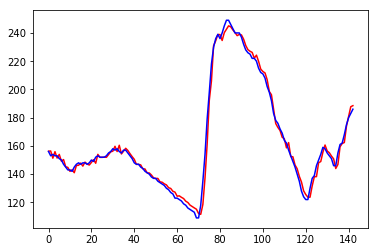

In [7]:
pre_List = []
for loop in range(len(test_x_data)):
    for i,k in enumerate(test_x_data[8]):
        ln = sess.run(Y_pre,feed_dict={X:[k],A1c:A1c_test[8],G:glucose_test[8]})
        print("실제혈당 : "+str(test_y_data[8][i])+"예측혈당 : "+str(ln[0][0]))
        pre_List.append(ln[0][0])
        #print([sess.run(Y_p,feed_dict={X:[k]})[0][0],10.0])
    break;


rmse_total = 0.0
rmse_one = 0.0
total_num = 0
one_person_num = 0
for size in range(len(test_x_data)):
    one_person_num = 0
    rmse_one = 0
    for i,k in enumerate(test_x_data[size]):
        total_num += 1
        one_person_num += 1
        #print(sess.run(rmse,feed_dict={X:[k],Y:[test_y_data[size][i]],A1c:[A1c_test[size][i]],G:[glucose_test[size][i]]}))
        tmp = sess.run(rmse,feed_dict={X:[k],Y:[test_y_data[size][i]],A1c:[A1c_test[size][i]],G:[glucose_test[size][i]]})
        rmse_total += tmp
        rmse_one += tmp
    print(str(size+1)+"번째 환자 rmse : "+str(rmse_one/float(one_person_num)))

rmse_total = rmse_total / float(total_num)
print("전체 평균 rmse : "+str(rmse_total))



plt.plot(pre_List,color="red")
plt.plot(test_y_data[8],color="blue")
plt.show()